In [1]:
import SimpleITK as sitk
import pims
# from nd2reader import ND2Reader
import numpy as np
import matplotlib.pyplot as plt
import sys
import tifffile as tf
sys.path.insert(0,'/home/jmamede/scripts')
# from support_pla import othercolor, cell_mask, multiply, rebin
from support_pla import convert16to8bits

from glob import glob

from pystackreg import StackReg
# from skimage import io

def rebin(arr, new_shape):
    from PIL import Image
    return np.array(Image.fromarray(arr).resize(new_shape,resample=Image.NEAREST))
sys.path.insert(0,'/home/jmamede/scripts/LivePanelize/')
import Libraries

#convert16to8bits(x,display_min=1000,display_max=65000,_GPU=True):

In [15]:
ficheiros = glob('/run/media/jmamede/Joao/multiplex/ENDO/img3_t1*tiff')
ficheiros.sort()
# ficheiros.pop(0)
ficheiros

['/run/media/jmamede/Joao/multiplex/ENDO/img3_t1_z1_c1-241D.tiff',
 '/run/media/jmamede/Joao/multiplex/ENDO/img3_t1_z1_c2-AG3.tiff',
 '/run/media/jmamede/Joao/multiplex/ENDO/img3_t1_z1_c3-SIM4.tiff',
 '/run/media/jmamede/Joao/multiplex/ENDO/img3_t1_z1_c4-DAPI.tiff']

In [9]:
type((123,12321))

tuple

In [16]:
(1,4,)+pims.open(ficheiros[0]).frame_shape

(1, 4, 19754, 33466)

In [17]:
#load reference and "moved" image
output = np.zeros((1,4,)+pims.open(ficheiros[0]).frame_shape)
for i,_file in enumerate(ficheiros):
    img = pims.open(_file)
    img8 = Libraries.convert16to8bits(img[0],display_min=np.min(img),display_max=np.max(img),_GPU=False)
    del img
    output[0,i,...] = img8

In [12]:
import napari
v = napari.Viewer(ndisplay=2)

for i in range(4):
    v.add_image(output[0,i,...],blending='additive')

/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19759, 35570) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,
/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19759, 35570) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,
/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19759, 35570) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,
/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19759, 35570) exceeds GL_MAX_TEXTURE_SIZE 1638

Frame([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
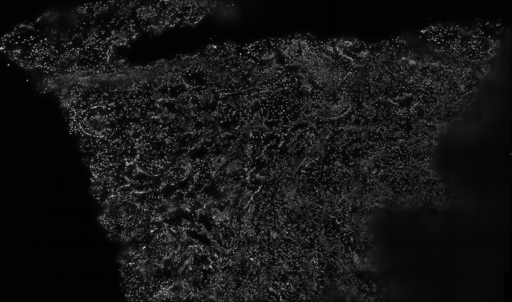

In [18]:
pims.Frame(output[:,3])

In [19]:
prjfile = '/run/media/jmamede/Joao/multiplex/ENDO/out/img3_8bit.tiff'

tifprj = tf.TiffWriter(prjfile, bigtiff=True, imagej=False)

tifprj.save(output.astype(np.uint8),
#         compression='ZLIB',
        tile = (2048, 2048),
#                                 compression=9,
#                         description = xml.to_xml(),
        photometric='minisblack',
        #, datetime= True
        metadata= None,
        contiguous=False,
        )

In [20]:
tifprj.close()
del output

In [10]:
for _img in output:
    print(_img.shape)

(19813, 33534)
(19813, 33534)
(19813, 33534)
(19813, 33534)
(19813, 33534)


In [11]:
import tifffile
import cv2  # for fast resizing

# load a 65536 x 65536 RGB example image


with tifffile.TiffWriter('pyramidal1.ome.tif', bigtiff=True) as tif:
    # use tiles and JPEG compression
    options = {'tile': (2048, 2048),
               'compression': 'ZLIB'
}
    for _img in output:
    # save the base image
        tif.save(_img,
    #              subifds=8, 
                 **options)
        # successively generate and save pyramid levels to the 8 SubIFDs
    #     for _ in range(8):
    #         output = cv2.resize(
    #             output,
    #             (output.shape[1] // 2, output.shape[0] // 2),
    #             interpolation=cv2.INTER_LINEAR
    #         )
    #         tif.save(output, **options)
    tif.close()

NameError: name 'ouput' is not defined

In [ ]:
tif.close()